# Tests

In [1]:
import os
import sys
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from termcolor import colored

# change this property
NOMEROFF_NET_DIR = "/var/www/nomeroff-net/"
MASK_RCNN_DIR = "/var/www/Mask_RCNN/"

MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, "logs/")
MASK_RCNN_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/mask_rcnn_numberplate_0700.h5")
REGION_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/npregion_v4_2018-12-27-295x64-2.h5")

sys.path.append(NOMEROFF_NET_DIR)

In [2]:
from NomeroffNet import  filters, RectDetector, TextDetector, RegionDetector, Detector, textPostprocessing

nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)
nnet.loadModel(MASK_RCNN_MODEL_PATH)

rectDetector = RectDetector()
textDetector = TextDetector()
regionDetector = RegionDetector()
regionDetector.load(REGION_MODEL_PATH)

Using TensorFlow backend.
/usr/local/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)
/usr/local/lib64/python3.6/site-packages/keras/engine/saving.py:304: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [3]:
def test(dirName, fname, y, verbose=0):
    img_path = os.path.join(dirName, fname)
    if verbose==1:
        print(colored(f"__________ \t\t {img_path} \t\t __________", "blue"))
    img = mpimg.imread(img_path)
    NP = nnet.detect([img])
    if verbose==1:
        print(colored("MASK_RCNN RESULTS:", "blue"))
        print(NP)
    cv_img_masks = filters.cv_img_mask(NP) 
    nGood = 0
    nBad = 0
    res = []
    for img_mask in cv_img_masks:
        #mpimg.imsave("mask.m.png", img_mask)
        points = rectDetector.detect(img_mask, fixRectangleAngle=1, outboundWidthOffset=3)
        if verbose==1:
            print(colored("RECT DETECTOR RESULTS:", "blue"))
            print(points)
        zone = rectDetector.get_cv_zones(img, points)

        if verbose==1:
            plt.axis("off")
            plt.imshow(zone)
            plt.show()
        regionId = regionDetector.predict(zone)
        regionName = regionDetector.getLabels(regionId)
        if verbose==1:
            print(colored("REGION NAME:", "blue"))
            print(regionName)
        text = textDetector.detect(zone)
        if verbose==1:
            print(colored("SOURCE TEXT:", "blue"))
            print(text)
        text = textPostprocessing(text, regionName)
        if verbose==1:
            print(colored("POSTPROCESSED TEXT:", "blue"))
            print(text)
        res.append(text)
    for yText in y:
        if yText in res:
            print(colored(f"OK: TEXT:{yText} \t RESULTS:{res} \t\t in PATH:{img_path}", 'green'))
            nGood += 1
        else:
            print(colored(f"NOT OK: TEXT:{yText} \t RESULTS:{res} \t\t in PATH:{img_path} ", 'red'))
            nBad += 1
    return nGood, nBad

In [4]:
dirName = "images/"
testData = {
    "0.jpeg": ["AI5255EI"],
    "1.jpeg": ["HH7777CC"],
    "2.jpeg": ["AT1515CK"],
    "3.jpeg": ["BX0578CE"],
    "4.jpeg": ["AC4249CB"],
    "5.jpeg": ["BC3496HC"],
    "6.jpeg": ["BC3496HC"],
    "7.jpeg": ["AO1306CH"],
    "8.jpeg": ["AE1077CO"],
    "9.jpeg": ["AB3391AK"],
    "10.jpeg": ["BE7425CB"],
    "11.jpeg": ["BE7425CB"],
    "12.jpeg": ["AB0608EA"],
    "13.jpeg": ["AB0680EA"],
    "14.jpeg": ["BM1930BM"],
    "15.jpeg": ["AI1382HB"],
    "16.jpeg": ["AB7333BH"],
    "17.jpeg": ["AB7642CT"],
    "18.jpeg": ["AC4921CB"],
    "19.jpeg": ["BC9911BK"],
    "20.jpeg": ["BC7007AK"],
    "21.jpeg": ["AB5649CI"],
    "22.jpeg": ["AX2756EK"],
    "23.jpeg": ["AA7564MX"],
    "24.jpeg": ["AM5696CK"],
    "25.jpeg": ["AM5696CK"],
}

gGood = 0
gBad = 0
i = 0
for fileName in testData.keys():
    print(f"step {i}")
    nGood, nBad = test(dirName, fileName, testData[fileName])
    gGood += nGood
    gBad += nBad
    i += 1
total = gGood + gBad
print(f"TOTAL GOOD: {gGood/total}")
print(f"TOTAL BED: {gBad/total}")

/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


step 0
OK: TEXT:AI5255EI 	 RESULTS:['AI5255EI'] 		 in PATH:images/0.jpeg
step 1


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:HH7777CC 	 RESULTS:['HH7777CC'] 		 in PATH:images/1.jpeg
step 2


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AT1515CK 	 RESULTS:['AT1515CK', 'NRP40881F'] 		 in PATH:images/2.jpeg
step 3


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:BX0578CE 	 RESULTS:['BX0578CE'] 		 in PATH:images/3.jpeg
step 4


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AC4249CB 	 RESULTS:['AC4249CB'] 		 in PATH:images/4.jpeg
step 5


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:BC3496HC 	 RESULTS:['BC3496HC'] 		 in PATH:images/5.jpeg
step 6


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:BC3496HC 	 RESULTS:['BC3496HC'] 		 in PATH:images/6.jpeg
step 7


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AO1306CH 	 RESULTS:['AO1306CH'] 		 in PATH:images/7.jpeg
step 8


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AE1077CO 	 RESULTS:['AE1077CO'] 		 in PATH:images/8.jpeg
step 9


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AB3391AK 	 RESULTS:['AB3391AK'] 		 in PATH:images/9.jpeg
step 10


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:BE7425CB 	 RESULTS:['BE7425CB'] 		 in PATH:images/10.jpeg
step 11


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


NOT OK: TEXT:BE7425CB 	 RESULTS:['OLD'] 		 in PATH:images/11.jpeg 
step 12


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


NOT OK: TEXT:AB0608EA 	 RESULTS:['BHEAN', 'EFIIIIIRG'] 		 in PATH:images/12.jpeg 
step 13


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/usr/local/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


OK: TEXT:AB0680EA 	 RESULTS:['AB0680EA', '', 'ESIFEIIE'] 		 in PATH:images/13.jpeg
step 14


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:BM1930BM 	 RESULTS:['BM1930BM', '', '/1177//48'] 		 in PATH:images/14.jpeg
step 15


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AI1382HB 	 RESULTS:['AI1382HB'] 		 in PATH:images/15.jpeg
step 16


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AB7333BH 	 RESULTS:['AB7333BH'] 		 in PATH:images/16.jpeg
step 17


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AB7642CT 	 RESULTS:['AB7642CT'] 		 in PATH:images/17.jpeg
step 18


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AC4921CB 	 RESULTS:['AC4921CB'] 		 in PATH:images/18.jpeg
step 19


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:BC9911BK 	 RESULTS:['BC9911BK'] 		 in PATH:images/19.jpeg
step 20


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:BC7007AK 	 RESULTS:['BC7007AK'] 		 in PATH:images/20.jpeg
step 21


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AB5649CI 	 RESULTS:['AB5649CI'] 		 in PATH:images/21.jpeg
step 22


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AX2756EK 	 RESULTS:['AX2756EK'] 		 in PATH:images/22.jpeg
step 23


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AA7564MX 	 RESULTS:['AA7564MX'] 		 in PATH:images/23.jpeg
step 24


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AM5696CK 	 RESULTS:['AM5696CK'] 		 in PATH:images/24.jpeg
step 25


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


OK: TEXT:AM5696CK 	 RESULTS:['AM5696CK'] 		 in PATH:images/25.jpeg
TOTAL GOOD: 0.9230769230769231
TOTAL BED: 0.07692307692307693


__________ 		 images/7.jpeg 		 __________


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


MASK_RCNN RESULTS:
[{'rois': array([[681, 107, 786, 372]], dtype=int32), 'class_ids': array([1], dtype=int32), 'scores': array([0.9998603], dtype=float32), 'masks': array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]]])}]
RECT DETECTOR RESULTS:
[[365.         740.19325043]
 [365.         791.1779306 ]
 [111.89264679 729.49632477]
 [111.89

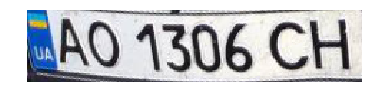

REGION NAME:
eu-ua-2015
SOURCE TEXT:
MAQ 1306 CH
POSTPROCESSED TEXT:
AO1306CH
OK: TEXT:AO1306CH 	 RESULTS:['AO1306CH'] 		 in PATH:images/7.jpeg


(1, 0)

In [5]:
test(dirName, "7.jpeg", ["AO1306CH"], verbose=1)